In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importing the data
data = pd.read_csv("cleaned_house_price_prediction.csv")
data.head() 

,Unnamed: 0,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,AREA_Adyar,...,UTILITY_AVAIL_NoSeWa,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,0,1004,131,4.0,3.9,4.9,4.330,144400,7600000,0,...,0,0,0,1,1,0,0,0,0,0
1,1,1986,26,4.9,4.2,2.5,3.765,304049,21717770,0,...,0,1,0,0,0,0,0,1,0,0
2,2,909,70,4.1,3.8,2.2,3.090,92114,13159200,1,...,0,1,0,0,0,0,0,0,1,0
3,3,1855,14,4.7,3.9,3.6,4.010,77042,9630290,0,...,1,0,0,1,0,0,1,0,0,0
4,4,1226,84,3.0,2.5,4.1,3.290,74063,7406250,0,...,0,1,0,0,0,1,0,0,0,0


In [4]:
data.isnull().sum()

Unnamed: 0               0
INT_SQFT                 0
DIST_MAINROAD            0
QS_ROOMS                 0
QS_BATHROOM              0
QS_BEDROOM               0
QS_OVERALL               0
COMMIS                   0
SALES_PRICE              0
AREA_Adyar               0
AREA_Anna Nagar          0
AREA_Chrompet            0
AREA_KK Nagar            0
AREA_Karapakkam          0
AREA_T Nagar             0
AREA_Velachery           0
N_BEDROOM_1.0            0
N_BEDROOM_2.0            0
N_BEDROOM_3.0            0
N_BEDROOM_4.0            0
N_BATHROOM_1.0           0
N_BATHROOM_2.0           0
N_ROOM_2                 0
N_ROOM_3                 0
N_ROOM_4                 0
N_ROOM_5                 0
N_ROOM_6                 0
SALE_COND_AbNormal       0
SALE_COND_AdjLand        0
SALE_COND_Family         0
SALE_COND_Normal Sale    0
SALE_COND_Partial        0
PARK_FACIL_No            0
PARK_FACIL_Yes           0
BUILDTYPE_Commercial     0
BUILDTYPE_House          0
BUILDTYPE_Others         0
U

In [5]:
# segregating independent and dependent variables
x = data.drop(['SALES_PRICE'],axis=1)
y = data['SALES_PRICE']
x.shape , y.shape

((7109, 48), (7109,))

In [6]:
# splitting data
from sklearn.model_selection import train_test_split
train_x , test_x,train_y,test_y = train_test_split(x,y,random_state = 56)

# Implementing Linear regression

In [7]:
# importing linear regression and mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [8]:
# creating instance of linear regression
lr = LR()

# fitting the model
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# predicting over the train set and calculating the error
train_predict = lr.predict(train_x)
k = mae(train_predict , train_y)
print('Training Mean Absoulute Error',k)

Training Mean Absoulute Error 596741.7853100663


In [10]:
# predicting over the test set and calculating the error
test_predict = lr.predict(test_x)
k = mae(test_predict , test_y)
print('Test Mean Absoulute Error',k)

Test Mean Absoulute Error 602044.1374787677


# Parameters of Linear Regeression

In [11]:
lr.coef_

array([ 3.08097383e-01,  3.88614341e+03, -1.38904185e+02, -8.19786971e+04,
       -7.11865004e+04, -7.84608150e+04,  2.90280411e+05,  2.81404503e+00,
        8.29735229e+05,  1.51437116e+06,  3.35494679e+05, -1.38739097e+06,
       -1.69943758e+06,  1.63826987e+06, -1.23104239e+06,  2.81943384e+05,
       -4.08174862e+04, -4.70207615e+05,  2.29081718e+05,  2.15127039e+05,
       -2.15127039e+05, -7.64118513e+05, -6.08045498e+05,  1.14756277e+05,
        1.02832602e+06,  2.29081718e+05,  1.08006742e+04,  3.16609284e+05,
       -9.32633772e+04,  3.75095660e+04, -2.71656148e+05, -5.02726625e+05,
        5.02726625e+05,  2.77359363e+06, -1.72086591e+06, -1.05272773e+06,
        1.71585858e+05, -1.30608330e+05, -4.09775286e+04,  5.46204490e+05,
       -5.75117981e+05,  2.89134908e+04, -1.40641209e+06, -8.85149664e+05,
       -2.66274618e+05,  2.44717647e+05,  8.56628229e+05,  1.45649049e+06])

Text(0.5, 1.0, 'Coefficient plot')

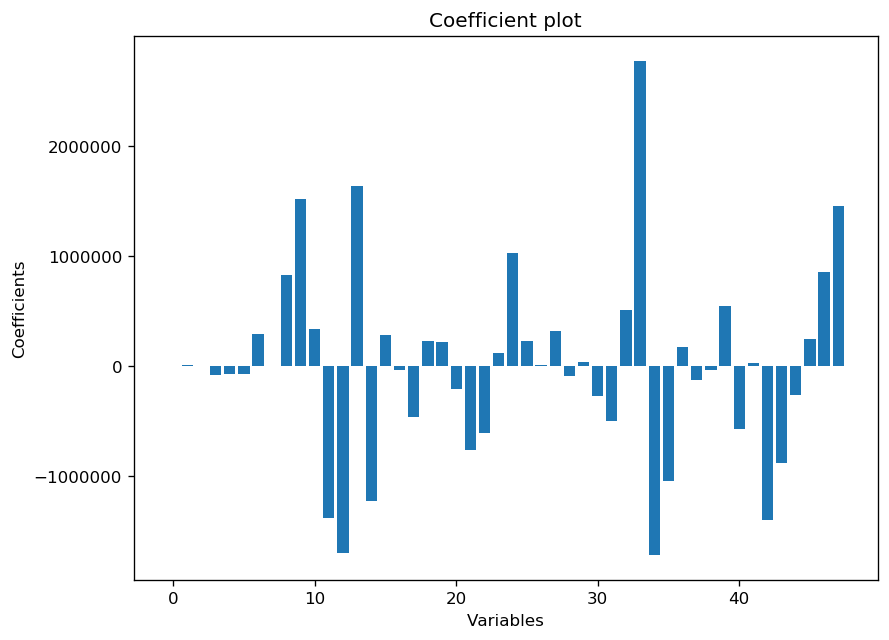

In [12]:
plt.figure(figsize=(8,6), dpi=120 , facecolor='w' ,edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y) 
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

# checking assumptions of linear model

In [13]:
# arranging and calculating the residuals 
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
2903,11949030,1.233998e+07,-390954.419284
3398,4873750,4.217343e+06,656407.066409
4011,9292000,9.789459e+06,-497459.357631
458,6149625,6.027320e+06,122304.563978
223,10722580,1.093519e+07,-212605.163013


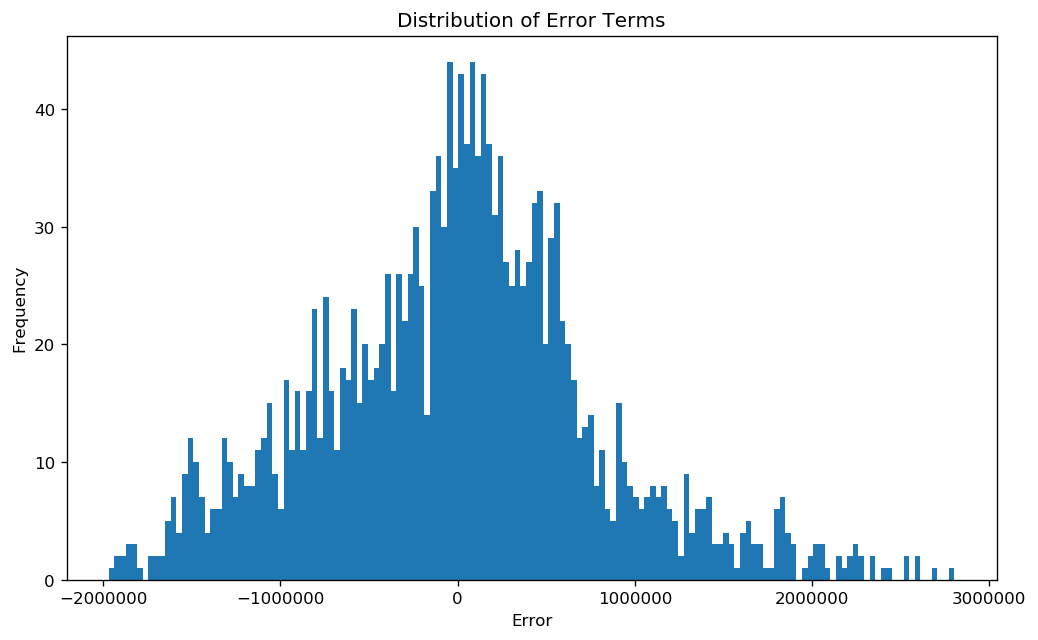

In [14]:
# checking distribution of residuals
plt.figure(figsize=(10,6), dpi=120 , facecolor='w' ,edgecolor='b')
plt.hist(residuals.residuals,bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

## QQ plot (is data normally distributed)

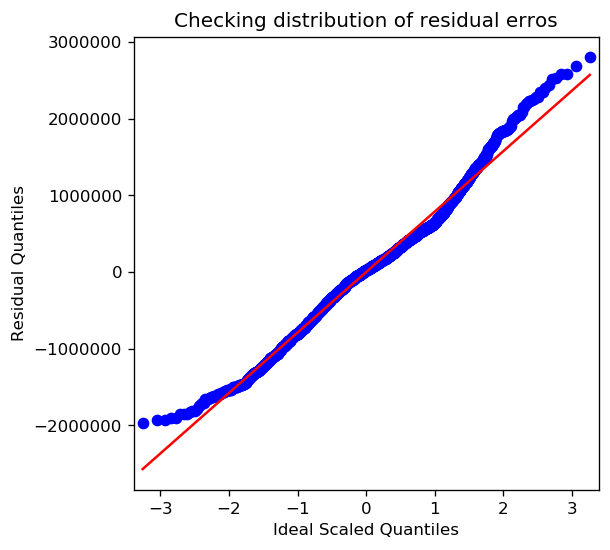

In [15]:
# importing the QQ-PLOT from statsmodels
from statsmodels.graphics.gofplots import qqplot

# plotting the qq plot
fig,ax = plt.subplots(figsize=(5,5),dpi=120)
qqplot(residuals.residuals,line = 's',ax=ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of residual erros')
plt.show()

In [16]:
# checking vif(variance inflation factor) for multi collinearity

#importig vif from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# calculating VIF for every column(only works for the non categorical)
VIF = pd.Series([variance_inflation_factor(data.values,i ) for i in range(data.shape[1])], index =data.columns)
VIF

C:\Users\akash\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Unnamed: 0                1.005556
INT_SQFT                 24.484902
DIST_MAINROAD             1.005374
QS_ROOMS                  8.862277
QS_BATHROOM              10.394919
QS_BEDROOM               13.211754
QS_OVERALL               30.522244
COMMIS                    2.195302
SALES_PRICE              22.840606
AREA_Adyar                     inf
AREA_Anna Nagar                inf
AREA_Chrompet                  inf
AREA_KK Nagar                  inf
AREA_Karapakkam                inf
AREA_T Nagar                   inf
AREA_Velachery                 inf
N_BEDROOM_1.0                  inf
N_BEDROOM_2.0                  inf
N_BEDROOM_3.0                  inf
N_BEDROOM_4.0                  inf
N_BATHROOM_1.0                 inf
N_BATHROOM_2.0                 inf
N_ROOM_2                       inf
N_ROOM_3                       inf
N_ROOM_4                       inf
N_ROOM_5                       inf
N_ROOM_6                       inf
SALE_COND_AbNormal             inf
SALE_COND_AdjLand   

# model interpretability

In [17]:
# scaling the variables in order to perform operation

# we can say normalising
# creating instance
lr = LR(normalize = True)

#fitting the model
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
# predicting over the train set and calculating the error
train_predict = lr.predict(train_x)
k = mae(train_predict , train_y)
print('Training Mean Absoulute Error',k)

Training Mean Absoulute Error 598882.7994747702


In [19]:
# predicting over the test set and calculating the error
test_predict = lr.predict(test_x)
k = mae(test_predict , test_y)
print('Test Mean Absoulute Error',k)

Test Mean Absoulute Error 603246.9623172104


Text(0.5, 1.0, 'Coefficient plot')

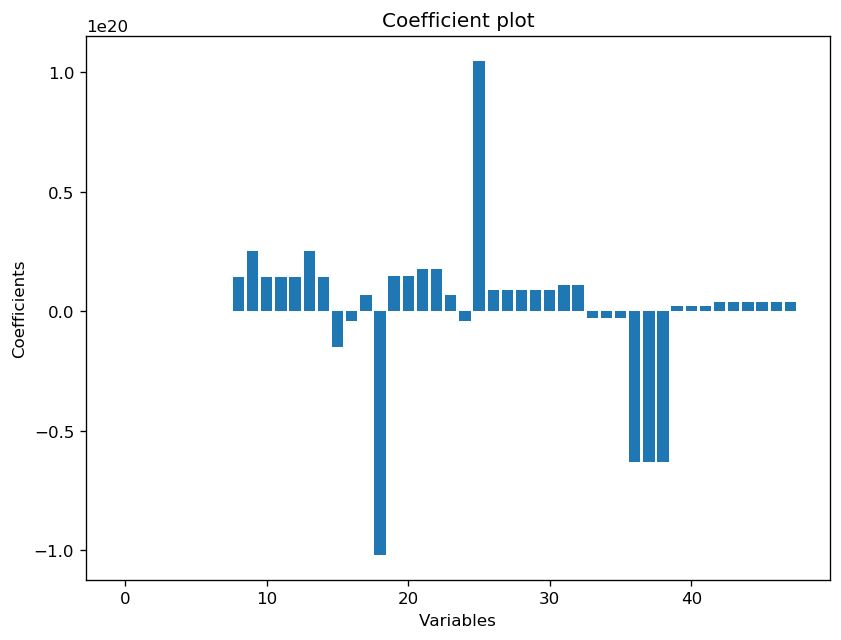

In [20]:
plt.figure(figsize=(8,6), dpi=120 , facecolor='w' ,edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y) 
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient plot')